In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9,7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import os

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
mnistx = np.load('../data/mnist.npz')
x,y = mnistx['x_train'],mnistx['y_train']
x_val,y_val = mnistx['x_test'],mnistx['y_test']

In [6]:
x = tf.convert_to_tensor(x,dtype=tf.float32)/255.
y = tf.convert_to_tensor(y,dtype=tf.int32)

In [7]:
print(x.shape,y.shape,x.dtype,y.dtype)
print(tf.reduce_min(x),tf.reduce_max(x))
print(tf.reduce_min(y),tf.reduce_max(y))

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)


In [8]:
train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print('batch:',sample[0].shape,sample[1].shape)

batch: (128, 28, 28) (128,)


In [9]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

In [10]:
lr = 1e-3

In [11]:
losses = []
for epoch in range(20): # iterate db for 10
    for step, (x, y) in enumerate(train_db): # for every batch
        # x:[128, 28, 28]
        # y: [128]

        # [b, 28, 28] => [b, 28*28]
        x = tf.reshape(x, [-1, 28*28])

        with tf.GradientTape() as tape: # tf.Variable
            # x: [b, 28*28]
            # h1 = x@w1 + b1
            # [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2@w3 + b3

            # compute loss
            # out: [b, 10]
            # y: [b] => [b, 10]
            y_onehot = tf.one_hot(y, depth=10)

            # mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y_onehot - out)
            # mean: scalar
            loss = tf.reduce_mean(loss)

        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])


        if step % 100 == 0:
            print(epoch, step, 'loss:', float(loss))

    losses.append(float(loss))

0 0 loss: 0.5338054895401001
0 100 loss: 0.20022039115428925
0 200 loss: 0.17863860726356506
0 300 loss: 0.1656949818134308
0 400 loss: 0.15569829940795898
1 0 loss: 0.15973229706287384
1 100 loss: 0.15003423392772675
1 200 loss: 0.14963778853416443
1 300 loss: 0.1412786990404129
1 400 loss: 0.1332014799118042
2 0 loss: 0.13784173130989075
2 100 loss: 0.13216860592365265
2 200 loss: 0.13272784650325775
2 300 loss: 0.12661023437976837
2 400 loss: 0.11849983036518097
3 0 loss: 0.12316127866506577
3 100 loss: 0.11991266906261444
3 200 loss: 0.12093563377857208
3 300 loss: 0.116185262799263
3 400 loss: 0.10822226107120514
4 0 loss: 0.11246740818023682
4 100 loss: 0.11102529615163803
4 200 loss: 0.11211087554693222
4 300 loss: 0.10839853435754776
4 400 loss: 0.10053110122680664
5 0 loss: 0.10446246713399887
5 100 loss: 0.10428972542285919
5 200 loss: 0.10523927211761475
5 300 loss: 0.10230372846126556
5 400 loss: 0.0946120172739029
6 0 loss: 0.0982014536857605
6 100 loss: 0.0990100353956222

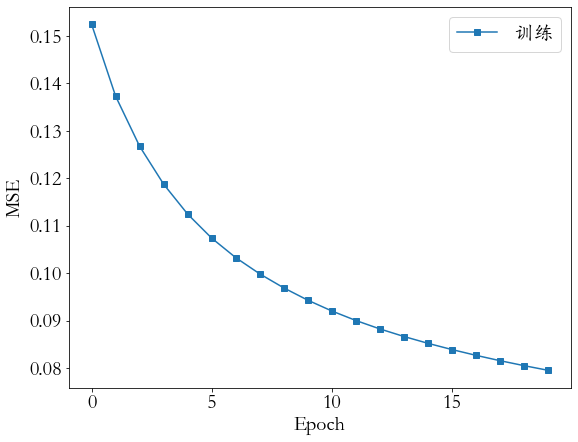

In [12]:
plt.figure()
plt.plot(losses, color='C0', marker='s', label='训练')
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('MSE')
plt.savefig('forward.svg')